In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Null values can be filled using impute  method of sklearn or fillna()

In [2]:
train_data = pd.read_excel(r"Data_train.xlsx")

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
train_data.shape


(10683, 11)

# EDA

In [10]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
30h 15m      1
27h 30m      1
37h 10m      1
27h 55m      1
35h 35m      1
Name: Duration, Length: 368, dtype: int64

In [11]:
train_data.dropna(inplace=True) ## Dropping the null values

In [12]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
train_data.shape

(10682, 11)

### The date of journey is a object data type and we need to convert it into a timestamp 
### pandas to_datetime can be used to convert object data type to datetime dtype
### .dt.day method will extract only day of that date
### .dt.month method will extract only moth of that date

In [14]:
train_data['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [15]:
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format ="%d/%m/%Y").dt.day

In [16]:
train_data['Journey_month']= pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [17]:
train_data['Journey_year'] = pd.to_datetime(train_data['Date_of_Journey'],format ="%d/%m/%Y").dt.year

In [18]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [19]:
### Dropping the date of journey
train_data.drop(labels = ['Date_of_Journey'], axis=1,inplace=True)

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [21]:
### preprocessing departure time
train_data['Dep_Hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

In [22]:
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [23]:
train_data.drop(labels=['Dep_Time'],axis=1,inplace=True)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [25]:
## Preprocessing arrival_time column
train_data['arrival_hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour

train_data['arrival_min'] = pd.to_datetime(train_data.Arrival_Time).dt.minute

train_data.drop(labels=['Arrival_Time'],axis=1,inplace=True)

In [26]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [27]:
## PreProcessing Duration

duration = list(train_data['Duration'])

duration_hrs = []
duration_min = []

for i in range(len(duration)):
    if duration[i].split() != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            
for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep="h")[0]))  # Extracting hours
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))


In [28]:
train_data['duration_hrs'] = duration_hrs
train_data['duration_mins'] = duration_min

train_data.drop(labels=['Duration'],axis=1,inplace=True)

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min,arrival_hour,arrival_min,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


### Handling Categorical Data

### 1) Nominal Data -> data are not in any order -> OneHotEncoder is used in this case

### 2) Ordinal data -> data are in order -> LabelEncoder is used in this case

In [30]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

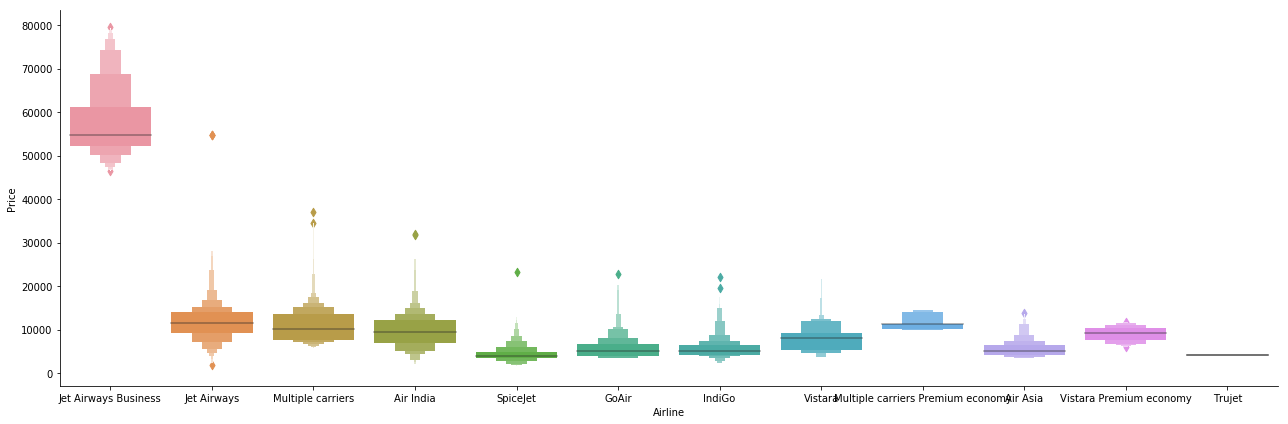

In [31]:
# Airline vs Price
sns.catplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [32]:
# One Hot Encoding 
train_data1 = train_data.drop(labels=['Price'],axis=1)
X_test = train_data['Price']

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cm = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[0,1,2])],remainder='passthrough')
train_data1 = cm.fit_transform(train_data1)

In [34]:
train_data1.shape

(10682, 35)

In [35]:
## Other way of doing one hot encoding
Airlines = train_data[['Airline']]
Airlines = pd.get_dummies(Airlines,drop_first=True)
Airlines.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [36]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [37]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [38]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [39]:
## Route is same to the no of stops and additional info is 80% no info
train_data.drop(labels=['Route','Additional_Info'],axis=1,inplace=True)

In [40]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min,arrival_hour,arrival_min,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45


In [41]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [42]:
# The more the stops the more is the price
# As this is case of ordinal Categorical Type we perfrom LabelEncoder

train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min,arrival_hour,arrival_min,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [43]:
# Concatenate the one hot encoding dataFrame
data_train = pd.concat([train_data,Airlines,Source,Destination],axis=1)

In [44]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min,arrival_hour,arrival_min,duration_hrs,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
data_train.drop(labels=['Airline','Source','Destination'],axis=1)

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min,arrival_hour,arrival_min,duration_hrs,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,2019,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,2019,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,2019,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [46]:
data_train.shape

(10682, 34)

###Test Set

In [47]:
test_data = pd.read_excel(r'Test_set.xlsx')

In [48]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [49]:
test_data['Journey_day'] = pd.to_datetime(test_data.Date_of_Journey, format ="%d/%m/%Y").dt.day
test_data['Journey_month'] = pd.to_datetime(test_data.Date_of_Journey, format ="%d/%m/%Y").dt.day
test_data['Journey_year'] = pd.to_datetime(test_data['Date_of_Journey'],format ="%d/%m/%Y").dt.year

In [50]:
### Dropping the date of journey
test_data.drop(labels = ['Date_of_Journey'], axis=1,inplace=True)

In [51]:
### preprocessing departure time
test_data['Dep_Hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour

test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute

test_data.drop(labels=['Dep_Time'],axis=1,inplace=True)

In [52]:
## Preprocessing arrival_time column
test_data['arrival_hour'] = pd.to_datetime(test_data.Arrival_Time).dt.hour

test_data['arrival_min'] = pd.to_datetime(test_data.Arrival_Time).dt.minute

test_data.drop(labels=['Arrival_Time'],axis=1,inplace=True)

In [53]:
## PreProcessing Duration

duration = list(test_data['Duration'])

duration_hrs = []
duration_min = []

for i in range(len(duration)):
    if duration[i].split() != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            
for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep="h")[0]))  # Extracting hours
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))

    
test_data['duration_hrs'] = duration_hrs
test_data['duration_mins'] = duration_min

test_data.drop(labels=['Duration'],axis=1,inplace=True)

In [54]:
## Other way of doing one hot encoding
Airlines = test_data[['Airline']]
Airlines = pd.get_dummies(Airlines,drop_first=True)
Airlines.head()

## Other way of doing one hot encoding
Source = test_data[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

## Other way of doing one hot encoding
Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [55]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min,arrival_hour,arrival_min,duration_hrs,duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,12,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,21,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,21,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,24,2019,23,55,2,45,2,50


In [56]:
## Route is same to the no of stops and additional info is 80% no info
test_data.drop(labels=['Route','Additional_Info'],axis=1,inplace=True)

In [57]:
# The more the stops the more is the price
# As this is case of ordinal Categorical Type we perfrom LabelEncoder

test_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min,arrival_hour,arrival_min,duration_hrs,duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,12,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,21,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,21,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,24,2019,23,55,2,45,2,50


In [58]:
# Concatenate the one hot encoding dataFrame
data_test = pd.concat([test_data,Airlines,Source,Destination],axis=1)

In [59]:
data_test.drop(labels=['Airline','Source','Destination'],axis=1)

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min,arrival_hour,arrival_min,duration_hrs,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,12,2019,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,21,2019,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,21,2019,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,24,2019,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,2019,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,27,27,2019,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,1,6,6,2019,21,50,4,25,6,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,6,6,2019,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [60]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min,arrival_hour,arrival_min,duration_hrs,duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,2019,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,12,2019,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,21,2019,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,21,2019,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,24,2019,23,55,2,45,2,50


In [61]:
# Concatenate the one hot encoding dataFrame
data_test = pd.concat([test_data,Airlines,Source,Destination],axis=1)

In [62]:
data_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min,arrival_hour,arrival_min,duration_hrs,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,2019,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,12,2019,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,21,2019,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,21,2019,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,24,2019,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [63]:
data_test.drop(labels=['Airline','Source','Destination'],axis=1,inplace=True)

In [64]:
data_train.drop(labels=['Airline','Source','Destination'],axis=1,inplace=True)

In [65]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min,arrival_hour,arrival_min,duration_hrs,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,2019,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,12,2019,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,21,2019,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,21,2019,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,24,2019,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [66]:
data_train.head()


,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min,arrival_hour,arrival_min,duration_hrs,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Feature Selection

### some of the feature selection methods : 1) heatmap  2)feature_importance_ 
### 3)SelectKBest

In [67]:
data_train.shape

(10682, 31)

In [68]:
data_test.shape

(2671, 29)

In [69]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_Hour', 'Dep_min', 'arrival_hour', 'arrival_min', 'duration_hrs',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [70]:
X = data_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Journey_year',
       'Dep_Hour', 'Dep_min', 'arrival_hour', 'arrival_min', 'duration_hrs',
       'duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_min,arrival_hour,arrival_min,duration_hrs,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [71]:
Y = data_train.iloc[:,1]
Y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

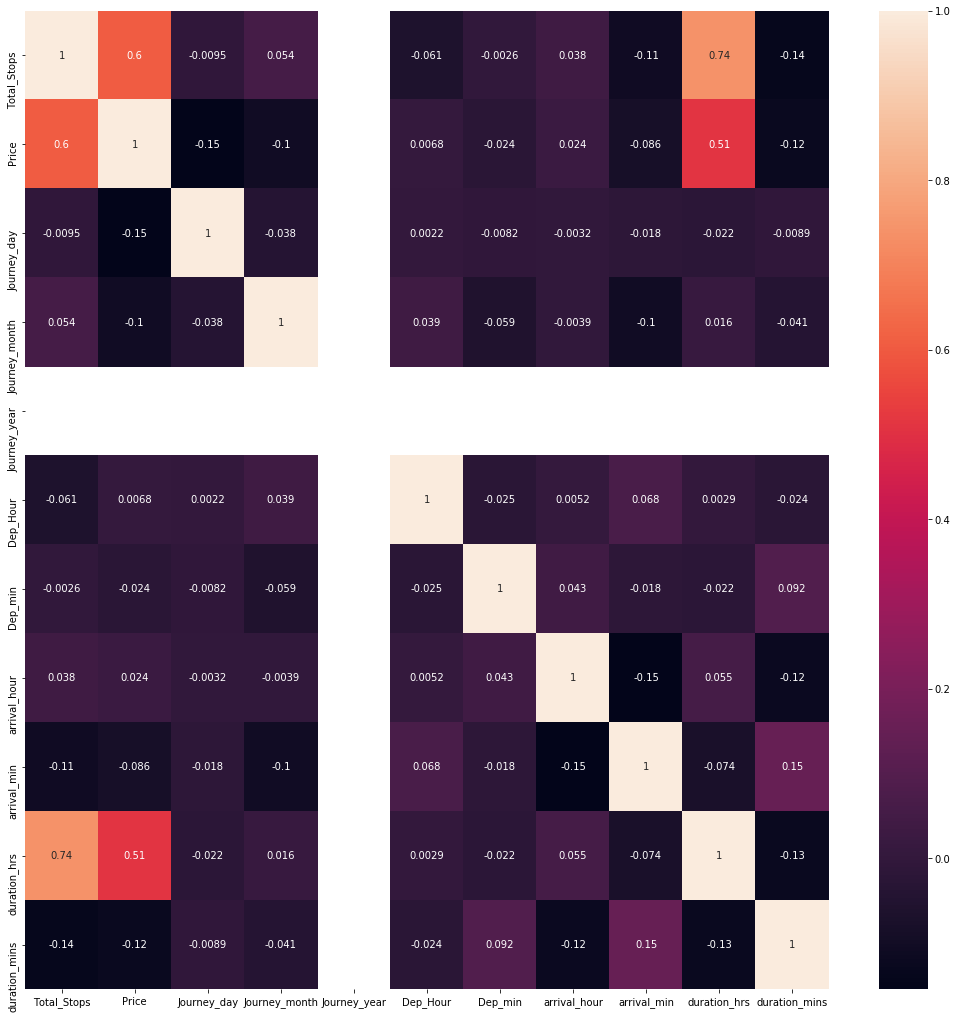

In [72]:
# Finds correlation btw indpendent and dependent variable

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)

C:\Users\saifgazali\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

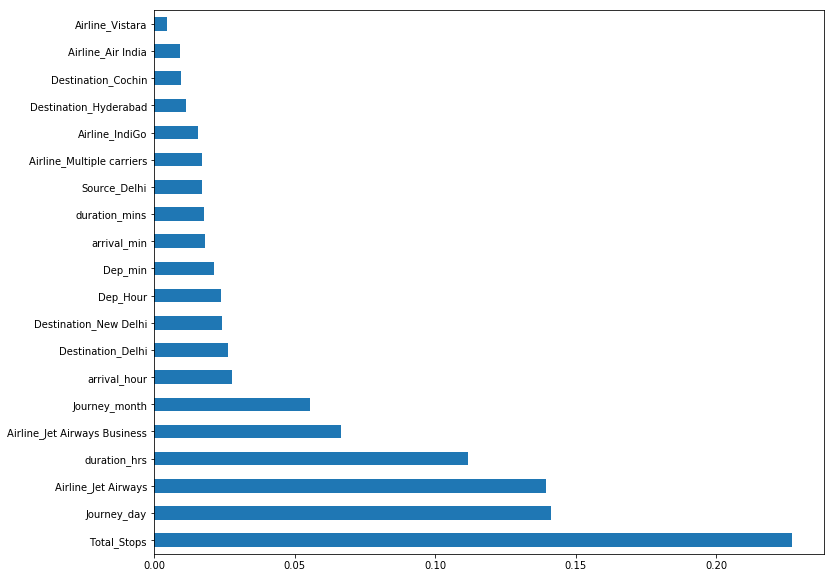

In [74]:
### Plot graph of feature importance for better visualization
plt.figure(figsize=(12,10))
feature_imp = pd.Series(selection.feature_importances_,index=X.columns)
feature_imp.nlargest(20).plot(kind='barh')
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [76]:
from xgboost import XGBRegressor
regressor = XGBRegressor()

In [77]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [78]:
regressor.score(X_train,Y_train)

0.9411740855206687

In [79]:
regressor.score(X_test,Y_test)

0.830757981572712

In [80]:
y_pred = regressor.predict(X_test)

C:\Users\saifgazali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


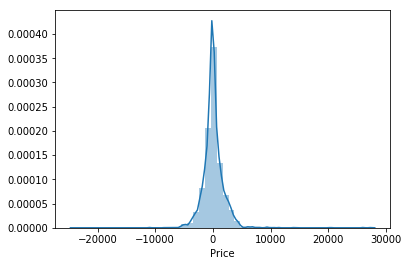

In [81]:
sns.distplot(Y_test-y_pred)
plt.show()    ### We have gaussian distribution so our prediction is good

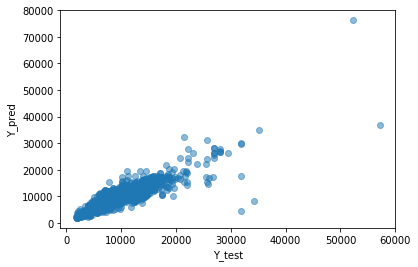

In [82]:
plt.scatter(Y_test,y_pred,alpha=0.5)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [92]:
## Hyperparameter tuning
parameters = {'base_score':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'max_depth':[2,4,6,8,10,12,14,16,18,20],'n_estimators':[10,20,30,40,50,60,70,80,90,100],'colsample_bytree':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'alpha':[10,20,30,40,50,60,70,80,90,100]}

In [93]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=regressor,param_grid=parameters,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)

In [94]:
from sklearn.model_selection import RandomizedSearchCV


In [97]:
randomziedSearchCV = RandomizedSearchCV(estimator=regressor,param_distributions=parameters,scoring='neg_mean_squared_error',cv=10,n_jobs=1,verbose=2)

In [98]:
randomziedSearchCV.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=40, max_depth=8, learning_rate=0.2, colsample_bytree=0.7, base_score=0.8, alpha=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=40, max_depth=8, learning_rate=0.2, colsample_bytree=0.7, base_score=0.8, alpha=100, total=   0.7s
[CV] n_estimators=40, max_depth=8, learning_rate=0.2, colsample_bytree=0.7, base_score=0.8, alpha=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=40, max_depth=8, learning_rate=0.2, colsample_bytree=0.7, base_score=0.8, alpha=100, total=   0.6s
[CV] n_estimators=40, max_depth=8, learning_rate=0.2, colsample_bytree=0.7, base_score=0.8, alpha=100 
[CV]  n_estimators=40, max_depth=8, learning_rate=0.2, colsample_bytree=0.7, base_score=0.8, alpha=100, total=   0.6s
[CV] n_estimators=40, max_depth=8, learning_rate=0.2, colsample_bytree=0.7, base_score=0.8, alpha=100 
[CV]  n_estimators=40, max_depth=8, learning_rate=0.2, colsample_bytree=0.7, base_score=0.8, alpha=100, total=   0.8s
[CV] n_estimators=40, max_depth=8, learning_rate=0.2, colsample_bytree=0.7, base_score=0.8, alpha=100 
[CV]  n_estimators=40, max_depth=8, learning_rate=0.2, colsample_bytree=0.7, base_score=0.8, alpha=100, total=   0.6s
[CV] n_estimators=40, max_depth=8, learning_rate=0.2, colsample_bytree=0.7, base_score=0.8, alpha=100 
[CV]  n_estimators=40, max_depth=8, learning_rate=0.2, colsample_bytree=0.7, base_score=0.8, alpha=100, total=   0.6

[CV]  n_estimators=80, max_depth=20, learning_rate=0.6, colsample_bytree=0.5, base_score=0.2, alpha=70, total=   5.1s
[CV] n_estimators=30, max_depth=8, learning_rate=0.3, colsample_bytree=0.3, base_score=0.9, alpha=20 
[CV]  n_estimators=30, max_depth=8, learning_rate=0.3, colsample_bytree=0.3, base_score=0.9, alpha=20, total=   0.2s
[CV] n_estimators=30, max_depth=8, learning_rate=0.3, colsample_bytree=0.3, base_score=0.9, alpha=20 
[CV]  n_estimators=30, max_depth=8, learning_rate=0.3, colsample_bytree=0.3, base_score=0.9, alpha=20, total=   0.2s
[CV] n_estimators=30, max_depth=8, learning_rate=0.3, colsample_bytree=0.3, base_score=0.9, alpha=20 
[CV]  n_estimators=30, max_depth=8, learning_rate=0.3, colsample_bytree=0.3, base_score=0.9, alpha=20, total=   0.2s
[CV] n_estimators=30, max_depth=8, learning_rate=0.3, colsample_bytree=0.3, base_score=0.9, alpha=20 
[CV]  n_estimators=30, max_depth=8, learning_rate=0.3, colsample_bytree=0.3, base_score=0.9, alpha=20, total=   0.2s
[CV] n

[CV]  n_estimators=80, max_depth=14, learning_rate=0.5, colsample_bytree=0.5, base_score=0.6, alpha=50, total=   4.0s
[CV] n_estimators=80, max_depth=14, learning_rate=0.5, colsample_bytree=0.5, base_score=0.6, alpha=50 
[CV]  n_estimators=80, max_depth=14, learning_rate=0.5, colsample_bytree=0.5, base_score=0.6, alpha=50, total=   3.9s
[CV] n_estimators=80, max_depth=14, learning_rate=0.5, colsample_bytree=0.5, base_score=0.6, alpha=50 
[CV]  n_estimators=80, max_depth=14, learning_rate=0.5, colsample_bytree=0.5, base_score=0.6, alpha=50, total=   3.7s
[CV] n_estimators=100, max_depth=10, learning_rate=0.5, colsample_bytree=0.5, base_score=0.1, alpha=10 
[CV]  n_estimators=100, max_depth=10, learning_rate=0.5, colsample_bytree=0.5, base_score=0.1, alpha=10, total=   3.5s
[CV] n_estimators=100, max_depth=10, learning_rate=0.5, colsample_bytree=0.5, base_score=0.1, alpha=10 
[CV]  n_estimators=100, max_depth=10, learning_rate=0.5, colsample_bytree=0.5, base_score=0.1, alpha=10, total=  

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.6min finished
C:\Users\saifgazali\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, miss... scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None),
          fit_params=None, iid='warn', n_iter=10, n_jobs=1,
          param_distributions={'base_score': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20], 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'alpha': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          retu

In [99]:
accuracy = randomziedSearchCV.best_score_
best_params = randomziedSearchCV.best_params_

In [100]:
print(accuracy)
print(best_params)

-3466086.1651251474
{'n_estimators': 40, 'max_depth': 8, 'learning_rate': 0.2, 'colsample_bytree': 0.7, 'base_score': 0.8, 'alpha': 100}


In [103]:
best_regressor = XGBRegressor(n_estimators= 40, max_depth= 8,learning_rate= 0.2,colsample_bytree=0.7,base_score= 0.8,alpha= 10)

In [104]:
best_regressor.fit(X_train,Y_train)

XGBRegressor(alpha=10, base_score=0.8, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.2, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=40, n_jobs=4, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=10,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [105]:
best_regressor.score(X_train,Y_train)

0.9287528201184716

In [106]:
best_regressor.score(X_test,Y_test)

0.8163655489888837

In [95]:
X.shape

(10682, 27)